Label Emmaüs offers an online marketplace of products renovated or created by the Emmaus movement. Its catalog is growing steadily. Adding an product to the catalog from reception to its descriptions (images, description, warehouse) is not an automated process and takes more and more time.

Finding a price and writing a description are not simple. It takes a lot time and experience to describe an item. Adding a product takes at least 40 minutes to go online. Many products stay on the site for a long time before finding a buyer. And increasing the catalog requires more and more storage space, which is not always available.

To the question "why my products do not sell", Label Emmaüs does not know the answer (except by the feeling of profession).

**The goal is to predict the duration between placing an object online and selling it.**

The data contains about 10,000 objects (with description, price, category, etc.). 
The duration is only known for a subset of products (the learning base).

It will be necessary to predict the duration for the products of the base of tests.

The target is categorized into 3 categories:
- 0 : between 0 and 10 days
- 1 : between 10 days and 60 days
- 2 : more than 60 days

# Python Tutorial - DSO 2019 Training

This tutorial is intended to guide people wishing to use Python to participate in the challenge.

It has 5 steps:

1. Importing data
2. Descriptive analysis
3. Data Preparation
4. Creating a template
5. Calculation of predictions and submissions

# Data Import

Let's install the necessary packages for this tutorial:

In [1]:
from sklearn import preprocessing


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.max_columns', 500)

X_train = pd.read_csv("data/X_train.csv", index_col=0, error_bad_lines=False)
X_test = pd.read_csv("data/X_test.csv", index_col=0, error_bad_lines=False)
y_train = pd.read_csv("data/y_train.csv", index_col=0)
X_train.head(3)

b'Skipping line 2168: expected 31 fields, saw 33\nSkipping line 4822: expected 31 fields, saw 37\nSkipping line 4859: expected 31 fields, saw 37\nSkipping line 7342: expected 31 fields, saw 37\n'


,images_count,image_width,image_height,image_url,product_description,product_size,material,age,warranty,year,color,product_width,wifi,condition,product_length,shoe_size,vintage,brand,author,editor,product_height,weight,price,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,product_name,store_name
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,3458.0,2552.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Superbe petit top bustier avec explosion de co...,44,100 % polyester,NaN,NaN,NaN,Multicolore,NaN,NaN,bon état,NaN,NaN,False,NaN,NaN,NaN,NaN,200.0,4.5,mode,"tops, t-shirts, débardeurs femme",NaN,NaN,NaN,Top bustier multicolore,Emmaüs 88 Neufchateau
1,2,2486.0,2254.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,"Radio ITT Océnic Flirt, année 70\nPour déco",NaN,Plastique,NaN,NaN,NaN,Jaune,NaN,NaN,en l'état,NaN,NaN,True,ITT Océanic,NaN,NaN,NaN,1000.0,15.0,mobilier - deco,bibelots et objets déco,NaN,NaN,NaN,Radio ITT Océanic,Communauté Emmaüs Thouars (magasin Parthenay)
2,3,1536.0,1536.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Veste boléro à manches courtes NÛMPH. Gris chi...,40,"Polyester, coton, laine",NaN,NaN,NaN,Gris,NaN,NaN,neuf,NaN,NaN,False,Nûmph,NaN,NaN,NaN,360.0,16.0,label selection,mode,mode femme,NaN,NaN,NaN,Label Emmaüs Chambéry


In [3]:
print("Dimension X_train:", X_train.shape)
print("Dimension X_test:", X_test.shape)

Dimension X_train: (8880, 30)
Dimension X_test: (2960, 30)


In [5]:
df = pd.concat([X_train,y_train], axis=1)
df.head()

,images_count,image_width,image_height,image_url,product_description,product_size,material,age,warranty,year,color,product_width,wifi,condition,product_length,shoe_size,vintage,brand,author,editor,product_height,weight,price,category,sub_category_1,sub_category_2,sub_category_3,sub_category_4,product_name,store_name,duration
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,3458.0,2552.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Superbe petit top bustier avec explosion de co...,44,100 % polyester,NaN,NaN,NaN,Multicolore,NaN,NaN,bon état,NaN,NaN,False,NaN,NaN,NaN,NaN,200.0,4.5,mode,"tops, t-shirts, débardeurs femme",NaN,NaN,NaN,Top bustier multicolore,Emmaüs 88 Neufchateau,2
1,2,2486.0,2254.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,"Radio ITT Océnic Flirt, année 70\nPour déco",NaN,Plastique,NaN,NaN,NaN,Jaune,NaN,NaN,en l'état,NaN,NaN,True,ITT Océanic,NaN,NaN,NaN,1000.0,15.0,mobilier - deco,bibelots et objets déco,NaN,NaN,NaN,Radio ITT Océanic,Communauté Emmaüs Thouars (magasin Parthenay),1
2,3,1536.0,1536.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Veste boléro à manches courtes NÛMPH. Gris chi...,40,"Polyester, coton, laine",NaN,NaN,NaN,Gris,NaN,NaN,neuf,NaN,NaN,False,Nûmph,NaN,NaN,NaN,360.0,16.0,label selection,mode,mode femme,NaN,NaN,NaN,Label Emmaüs Chambéry,1
3,2,1100.0,1100.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Encrier plumier en verre. De forme carrée le ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bon état,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.0,24.0,mobilier - deco,autres objets,NaN,NaN,NaN,Encrier Plumier en verre,Emmaüs Lyon,1
4,2,450.0,450.0,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,Si vous souhaitez acquérir un appareil puissan...,NaN,NaN,NaN,6 mois,NaN,Blanc,NaN,True,reconditionné,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,139.0,multimédia,smartphones,NaN,NaN,NaN,HUAWEI Honor 5X Blanc - Débloqué - Très bon état.,La Bootique des Ateliers du Bocage,0


In [4]:
df_all = pd.concat([X_train,X_test], axis=0)
df_all.shape

(11840, 30)

In [20]:
df_all.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
images_count,11840,NaN,NaN,NaN,3.65465,2.05784,0,2,3,5,29
image_width,11770,NaN,NaN,NaN,1804.89,1021.47,58,1000,1536,2448,5472
image_height,11770,NaN,NaN,NaN,1800.66,1103.08,64,962.75,1536,2448,6016
image_url,11770,11681,https://d1kvfoyrif6wzg.cloudfront.net/assets/i...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_description,11840,11768,<br>Fabriqué à par les artisans-apprenants d'E...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_size,3232,33,38,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
material,5252,2174,Coton,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,168,18,4a,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
warranty,127,2,6 mois,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1983,NaN,NaN,NaN,11667,431160,0,1979,1998,2007,1.92019e+07


### the products that repeats 

In [15]:
df.product_name.value_counts()

carte postale                                                                      6
Vase                                                                               6
Collection Papillons                                                               4
Parce que je t'aime - Guillaume Musso                                              4
Poupée en porcelaine.                                                              4
Sac à main                                                                         4
Set compas pour dessin technique                                                   4
Poupée en Porcelaine                                                               4
Voiture Tintin                                                                     3
Lot de 4 œufs de collection Franklin Mint                                          3
Boucles d'oreilles vintage                                                         3
Sac à main Arthur et Aston                                       

## product_size - cat

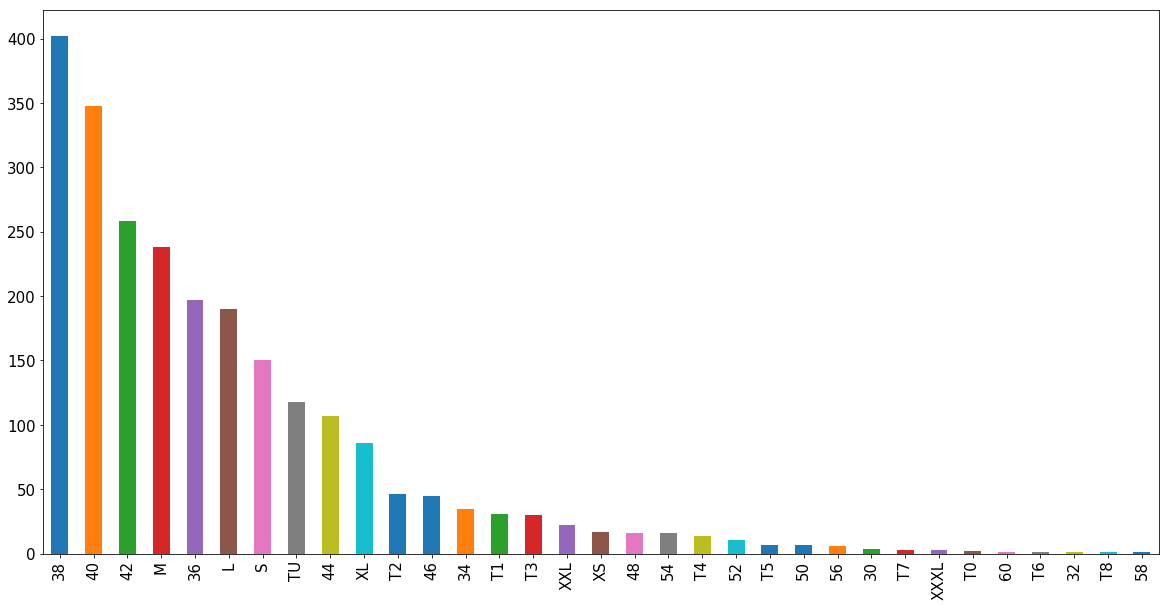

In [13]:
X_train["product_size"].value_counts().plot.bar(figsize = (20,10),
                                               fontsize = 15)

### product_width


### product_length

## material

In [17]:
X_train["material"].value_counts()

Coton                                                                             144
Cuir                                                                              107
100% coton                                                                         89
cuir                                                                               70
coton                                                                              69
non renseignée                                                                     65
Polyester                                                                          54
Bois                                                                               53
Métal                                                                              48
100% polyester                                                                     46
Laine                                                                              46
bois                                                  

### age

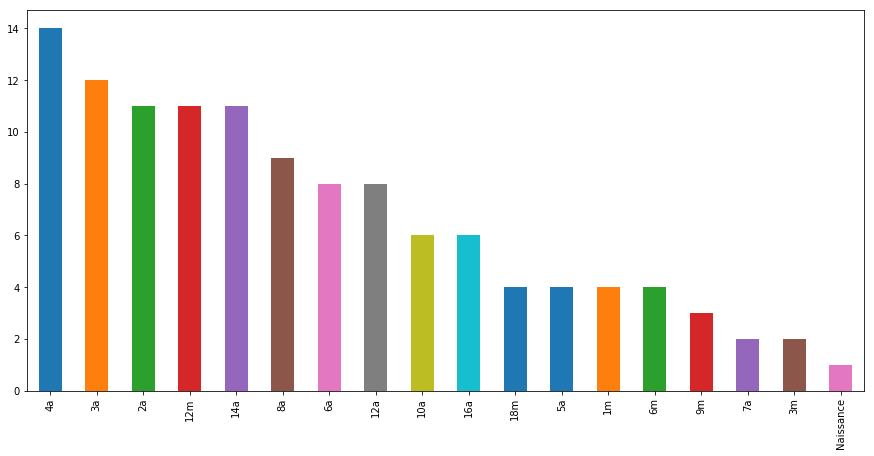

In [21]:
X_train['age'].value_counts().plot.bar(figsize=(15,7))

### year

In [43]:
X_train['year'].describe().apply(lambda x: format(x,'f'))

count        1497.000000
mean        14810.114896
std        496236.950822
min             0.000000
25%          1979.000000
50%          1998.000000
75%          2007.000000
max      19201930.000000
Name: year, dtype: object

In [38]:
X_train['year'][X_train['year'].notnull()].describe().apply(lambda x: format(x,'f'))

count        1497.000000
mean        14810.114896
std        496236.950822
min             0.000000
25%          1979.000000
50%          1998.000000
75%          2007.000000
max      19201930.000000
Name: year, dtype: object

In [53]:
# X_train['year'][X_train['year'].notnull()].value_counts().plot.bar(figsize=(15,8))

In [54]:
X_train['warranty'].value_counts()

6 mois    100
3 mois      1
Name: warranty, dtype: int64

### category


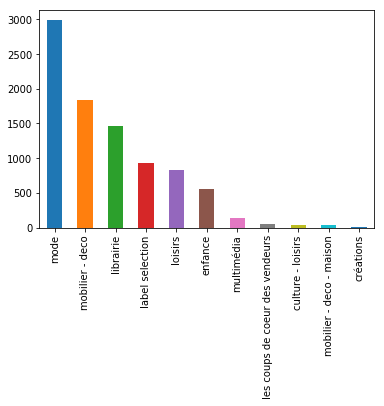

In [22]:
X_train['category'].value_counts().plot.bar()

## condition

In [28]:
X_train['condition'].isnull().sum()

24

In [29]:
X_train['condition'].value_counts().plot.bar(figsize = (15,8), fontsize = 15 )

bon état         4537
en l'état        1577
comme neuf       1110
reconditionné     885
neuf              747
Name: condition, dtype: int64

In [50]:
def fix_condition(df):
    conditions = ['vide','autre','reconditionné','comme neuf','neuf','en l\'état','bon état']
    df['condition'].fillna('vide',inplace=True)    
    df['condition'].apply(lambda x : x if x in conditions else 'autre')
    le = preprocessing.LabelEncoder()
    le.fit(conditions)
    df['condition'] = le.transform(df['condition']) 
    

## price

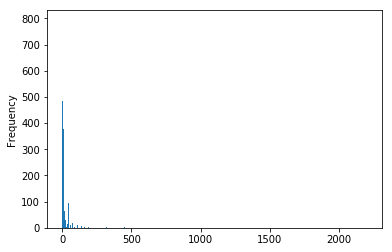

In [100]:
X_train.price.plot(kind='hist',bins=10)

In [67]:
X_train.price.describe()

count    8880.000000
mean       21.503309
std        44.024320
min         0.500000
25%         6.000000
50%        10.000000
75%        20.000000
max      2200.000000
Name: price, dtype: float64

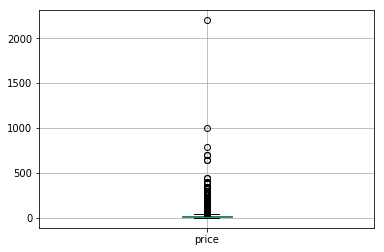

In [70]:
X_train.boxplot('price')

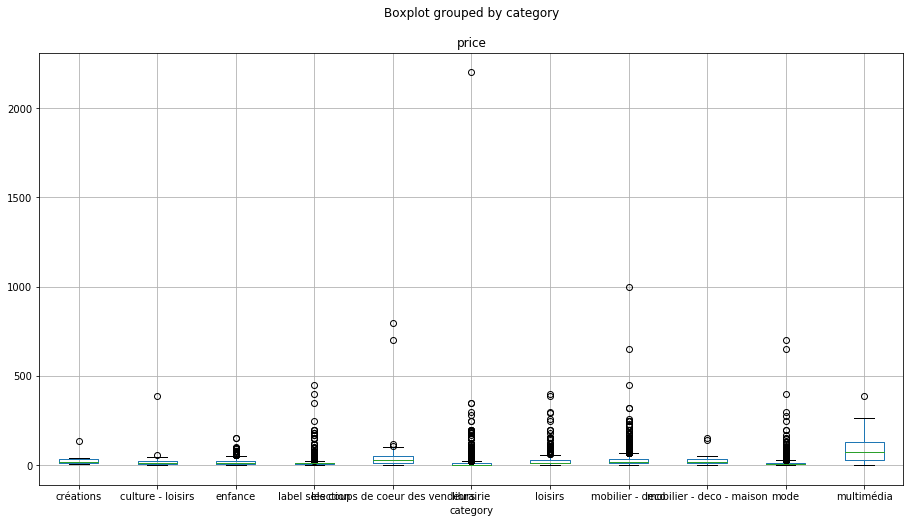

In [72]:
X_train.boxplot('price', by='category',
               figsize=(15,8))

In [75]:
low,high = .05, .95
price_quant = X_train.price.quantile([low,high])
price_quant

0.05     2.195
0.95    70.000
Name: price, dtype: float64

In [85]:
price_quant.loc[low]

2.1950000000000047

In [94]:
filter_price_quant = X_train.price.apply(lambda x : (x > price_quant.loc[low]) &  (x < price_quant.loc[high])) 


In [97]:
price_no_outliers = X_train.price[filter_price_quant]
price_no_outliers.describe()

count    7967.000000
mean       15.506351
std        12.747048
min         2.200000
25%         7.000000
50%        10.000000
75%        20.000000
max        69.000000
Name: price, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x24d38782208>],
 'caps': [<matplotlib.lines.Line2D at 0x24d387e7908>,
 'fliers': [<matplotlib.lines.Line2D at 0x24d38881080>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x24d3883afd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x24d3879f780>,
  <matplotlib.lines.Line2D at 0x24d387bd588>]}

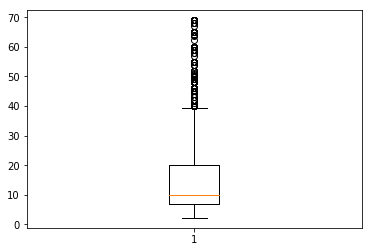

In [104]:
plt.boxplot(price_no_outliers)

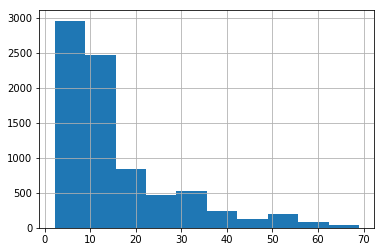

In [98]:
price_no_outliers.hist()

### store_name

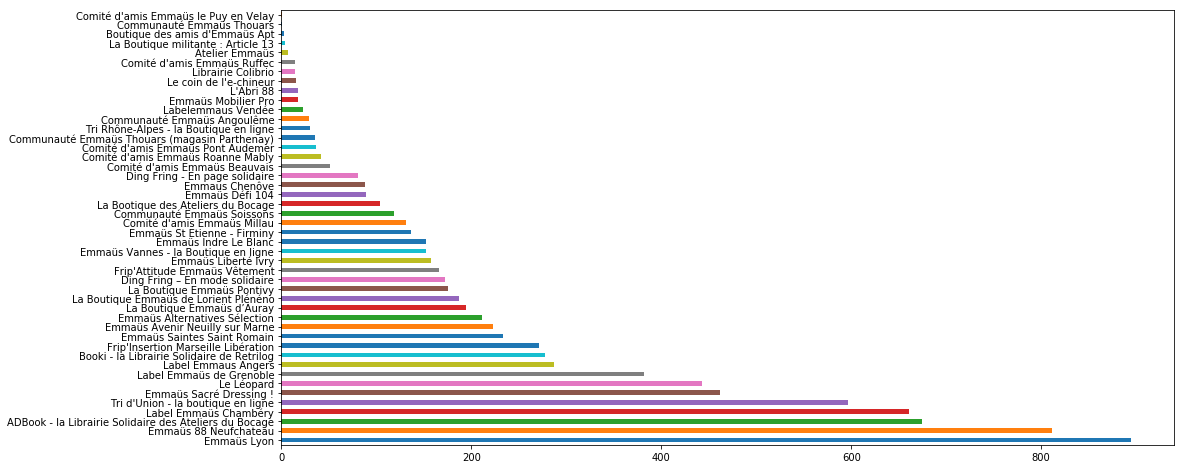

In [109]:
X_train['store_name'].value_counts().plot.barh(figsize=(16,8))

### wifi

In [14]:
print(df_all['wifi'].describe())
print(df_all['wifi'].value_counts())
print("is null? ", df_all['wifi'].isnull().sum())

count      101
unique       2
top       True
freq        78
Name: wifi, dtype: object
True     78
False    23
Name: wifi, dtype: int64
is null?  11739


### vintage

In [15]:
print(df_all['vintage'].describe())
print(df_all['vintage'].value_counts())
print("is null? ", df_all['vintage'].isnull().sum())

count      7810
unique        2
top       False
freq       5082
Name: vintage, dtype: object
False    5082
True     2728
Name: vintage, dtype: int64
is null?  4030


## product_description

## image related featues :
images_count,image_width, image_hight, image_url